In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 분류를 위한 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
# train / test/ data set 분리를 위한 라이브러리
from sklearn.model_selection import train_test_split

In [4]:
# 성능 평가를 위한 라이브러리
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score

In [5]:
# 데이터 불러오기
from sklearn.datasets import load_iris

로지스틱 회귀_ 간단한 예제

In [6]:
# training data 정의
x = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
y = np.array([0,0,0,1,1,1]) # 여기에 있는 0과 1 이 클래스에 나옴

# 앞의 3개 음의 값을 0으로 코딩하고, 뒤에 3개의 양의 값을 1로 코딩한 것


# test_data 정의
#test_x = [[-2,2]]
# 예시로 만듦

# 모두 양수일 확률
test_x = [[2,2]]
# 예시로 만듦

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D 그래프를 위한 모듈

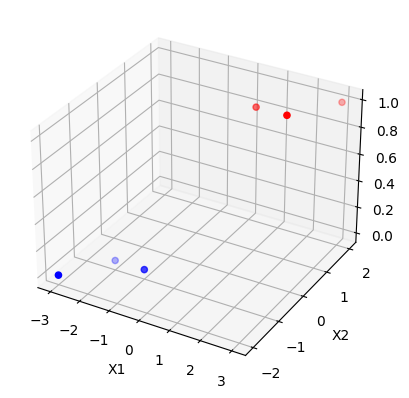

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter([-1, -2, -3], [-1, -1, -2], [0, 0, 0], color='blue')
ax.scatter([1, 2, 3], [1, 1, 2], [1, 1, 1], color='red')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [9]:
# 훈련
lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [10]:
# 클래스 확률 예측
lr.predict_proba(test_x)
# 클래스가 0 => 모두 음수일 확률 == 4.9 %
# 클래스가 1 => 모두 양수일 확률 == 95.1%

array([[0.04891763, 0.95108237]])

In [11]:
lr.predict(test_x)

array([1])

선형판별분석(LDA) 간단한 예제

In [12]:
x = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
y = np.array([0,0,0,1,1,1])# 여기에 있는 0과 1 이 클래스에 나옴

test_x = [[2,2]]

In [13]:
lda = LinearDiscriminantAnalysis()
lda.fit(x,y)

LinearDiscriminantAnalysis()

In [14]:
lda.predict_proba(test_x)
# 클래스 1일 확률 99.9%
# 클래스 = y에 있는 데이터

array([[1.12535162e-07, 9.99999887e-01]])

In [15]:
lda.predict(test_x)

array([1])

HEART 데이터 분석

In [20]:
heart = pd.read_csv('/content/drive/MyDrive/MLP_bigdata/data/Heart.csv',index_col = 0)
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [21]:
# 독립변수, 종속변수

x = heart[['Age','Sex','Chol']]
y = heart[['AHD']]

In [22]:
# 훈련용 / 평가용 데이터 분리

x_train, x_test, y_train, y_test = \
train_test_split(x,y, test_size= 0.2, random_state=42, stratify= y)

In [23]:
# 훈련
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [24]:
# 테스트 데이터 사용, 예측
y_pred = lda.predict(x_test)

In [25]:
y_pred

array(['Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes'], dtype='<U3')

In [26]:
y_test

,AHD
220,No
272,No
90,No
102,No
68,No
...,...
286,Yes
244,Yes
95,No
292,No


In [27]:
# confustion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[23, 10],
       [11, 17]])

In [28]:
# 분류 결과 평가

# precision(정밀도) TP / (TP + FP)
precision_score(y_test,y_pred, average= 'macro')
# 안정적이지만 성능은 안좋음
# 90% 이상은 나와야함

0.6530501089324618

In [29]:
# Recall(재현율) TP / (TP + FN)
recall_score(y_test,y_pred, average= 'macro')
# 안정적이지만 성능은 안좋음
# 90% 이상은 나와야함

0.652056277056277

In [30]:
# accuracy(정확도) (TP + TN) / ALL
accuracy_score(y_test,y_pred)
# 안정적이지만 성능은 안좋음
# 90% 이상은 나와야함

0.6557377049180327

iris data 예제

In [31]:
x_iris, y_iris = load_iris(return_X_y= True)
# X,y 형태로 데이터를 받겠다는 의미

In [33]:
x_iris[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [36]:
y_iris
# 0,1,2 = 3가지의 클래스가 존재

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
# 훈련
lr = LogisticRegression(random_state=42)
lr.fit(x_iris,y_iris)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [40]:
# 클래스 예측
lr.predict(x_iris)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
# 클래스 예측(비율)
lr.predict_proba(x_iris)

array([[9.81814913e-01, 1.81850723e-02, 1.43960976e-08],
       [9.71755297e-01, 2.82446727e-02, 3.01076466e-08],
       [9.85463233e-01, 1.45367551e-02, 1.23031068e-08],
       [9.76312207e-01, 2.36877535e-02, 3.96564575e-08],
       [9.85396856e-01, 1.46031318e-02, 1.19202313e-08],
       [9.70481425e-01, 2.95185016e-02, 7.33813741e-08],
       [9.86898273e-01, 1.31017073e-02, 1.99463422e-08],
       [9.76418120e-01, 2.35818523e-02, 2.75765278e-08],
       [9.79860025e-01, 2.01399439e-02, 3.06393628e-08],
       [9.69157991e-01, 3.08419778e-02, 3.15873199e-08],
       [9.76523568e-01, 2.34764131e-02, 1.91763097e-08],
       [9.75422278e-01, 2.45776784e-02, 4.37767353e-08],
       [9.74583207e-01, 2.54167711e-02, 2.14437755e-08],
       [9.91980685e-01, 8.01931086e-03, 3.88786017e-09],
       [9.88217048e-01, 1.17829488e-02, 2.79979676e-09],
       [9.86782344e-01, 1.32176434e-02, 1.27599338e-08],
       [9.88128243e-01, 1.18717479e-02, 9.17831577e-09],
       [9.81572611e-01, 1.84273

In [42]:
# accuracy
lr.score(x_iris,y_iris)

0.9733333333333334